Визуализация активации в свёрточных нейронных сетях на примере распознавания чисел из датасета MNIST.
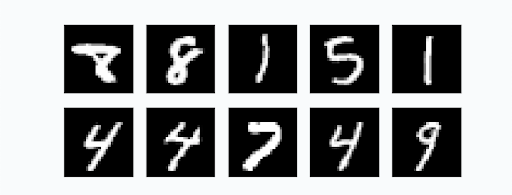
Визуализируем активации с помощью утилиты `keract`.

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from keract import get_activations, display_activations

In [2]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 25
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2
VERBOSITY = 1

In [3]:
# Загружаем датасет MNIST.
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [4]:
# Подготавливаем данные.
input_train = input_train.reshape(input_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
input_test = input_test.reshape(input_test.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

# Нормализуем данные (0-255 -> 0-1.0).
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
input_train = input_train / 255
input_test = input_test / 255

target_train = tensorflow.keras.utils.to_categorical(target_train, NUM_CLASSES)
target_test = tensorflow.keras.utils.to_categorical(target_test, NUM_CLASSES)

In [5]:
# Либо загружаем обученную модель.
#model = load_model("cnn_mnist_classification")

In [6]:
# Либо создаём модель.
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [7]:
# И обучаем её.
model.compile(
    loss=tensorflow.keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(
    input_train,
    target_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/25
192/192 [==============================] - 14s 70ms/step - loss: 0.8484 - accuracy: 0.7670 - val_loss: 0.1480 - val_accuracy: 0.9557
Epoch 2/25
192/192 [==============================] - 13s 66ms/step - loss: 0.1298 - accuracy: 0.9627 - val_loss: 0.0856 - val_accuracy: 0.9753
Epoch 3/25
192/192 [==============================] - 12s 63ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 0.0674 - val_accuracy: 0.9798
Epoch 4/25
192/192 [==============================] - 12s 64ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0599 - val_accuracy: 0.9809
Epoch 5/25
192/192 [==============================] - 12s 61ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0561 - val_accuracy: 0.9842
Epoch 6/25
192/192 [==============================] - 12s 60ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 7/25
192/192 [==============================] - 12s 60ms/step - loss: 0.0326 - accuracy: 0.9907 - val_loss: 0.0517 - val_accuracy:

In [8]:
# Сохраняем модель.
model.save("cnn_mnist_classification")

INFO:tensorflow:Assets written to: cnn_mnist_classification\assets


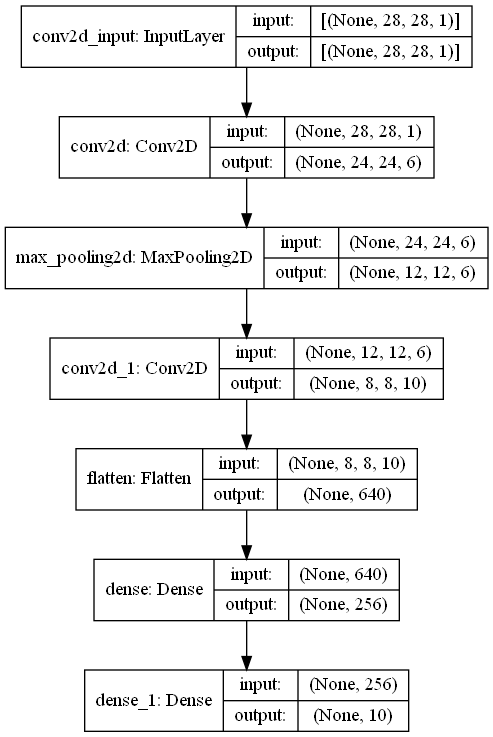

In [9]:
# Визуализируем модель.
plot_model(model, show_shapes = True)

conv2d_input (1, 28, 28, 1) 


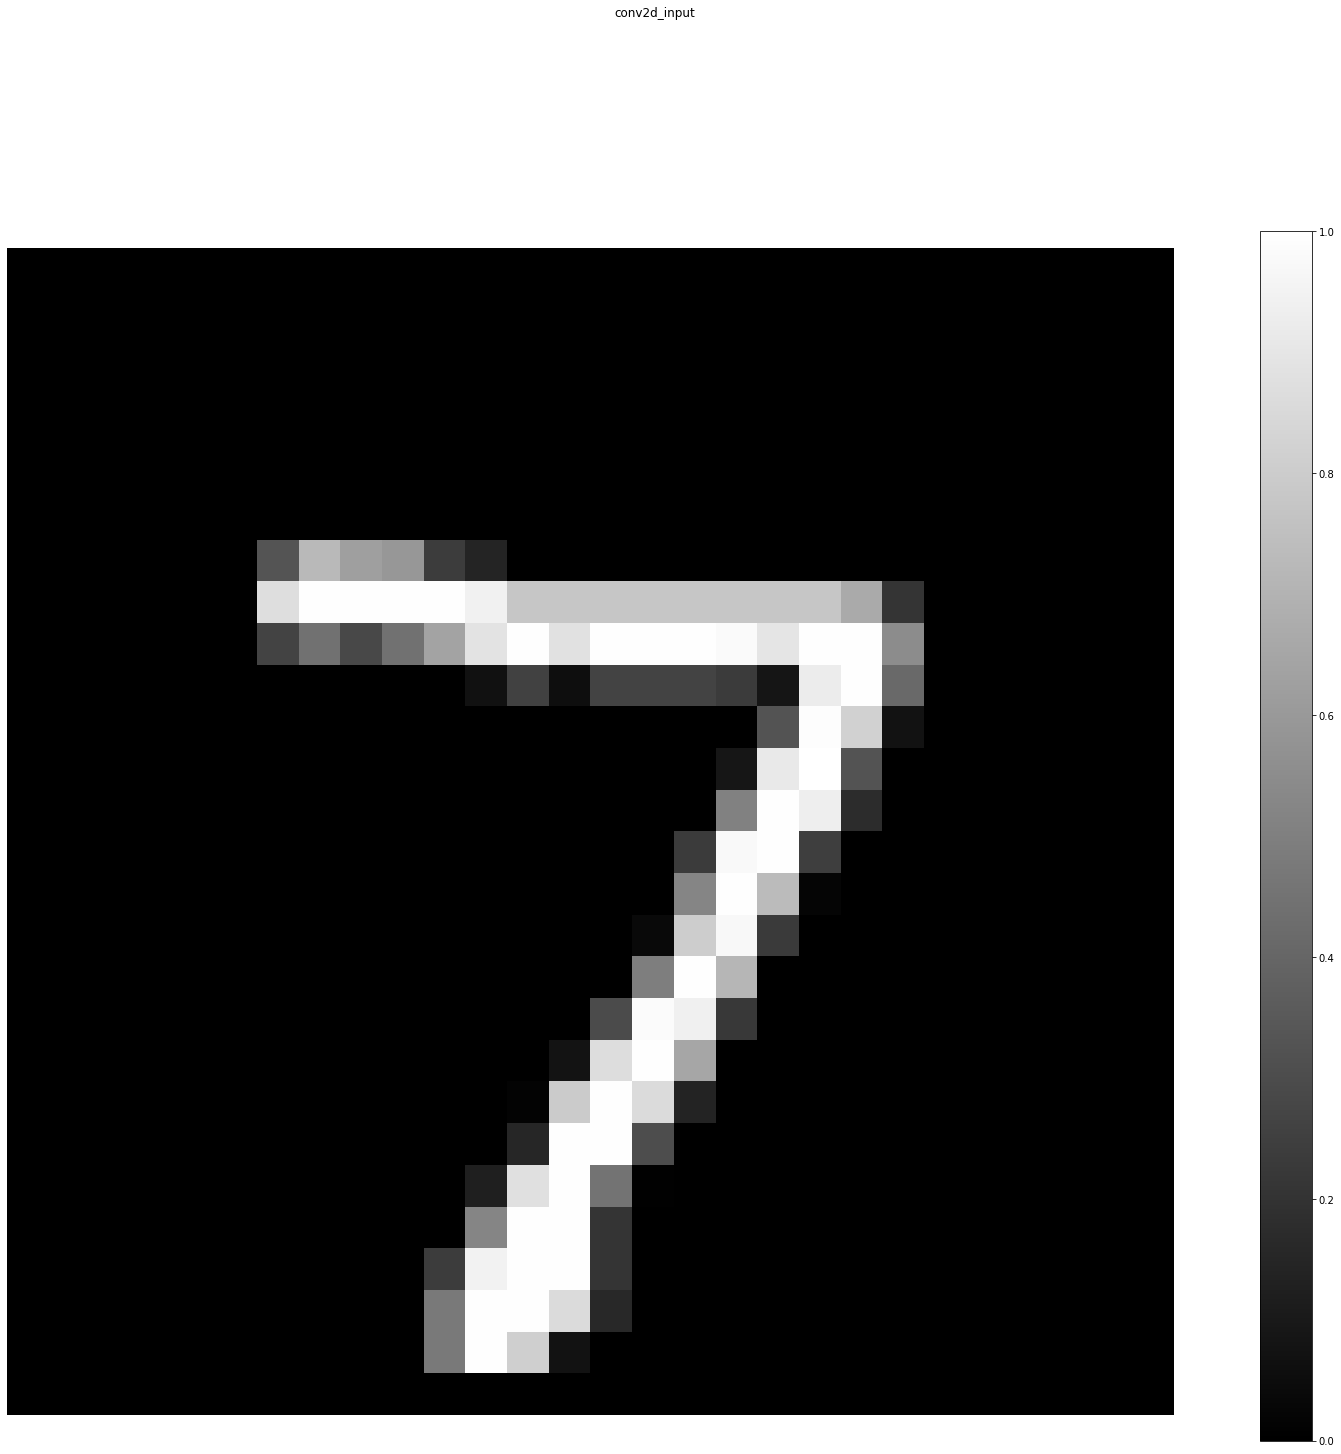

conv2d (1, 24, 24, 6) 


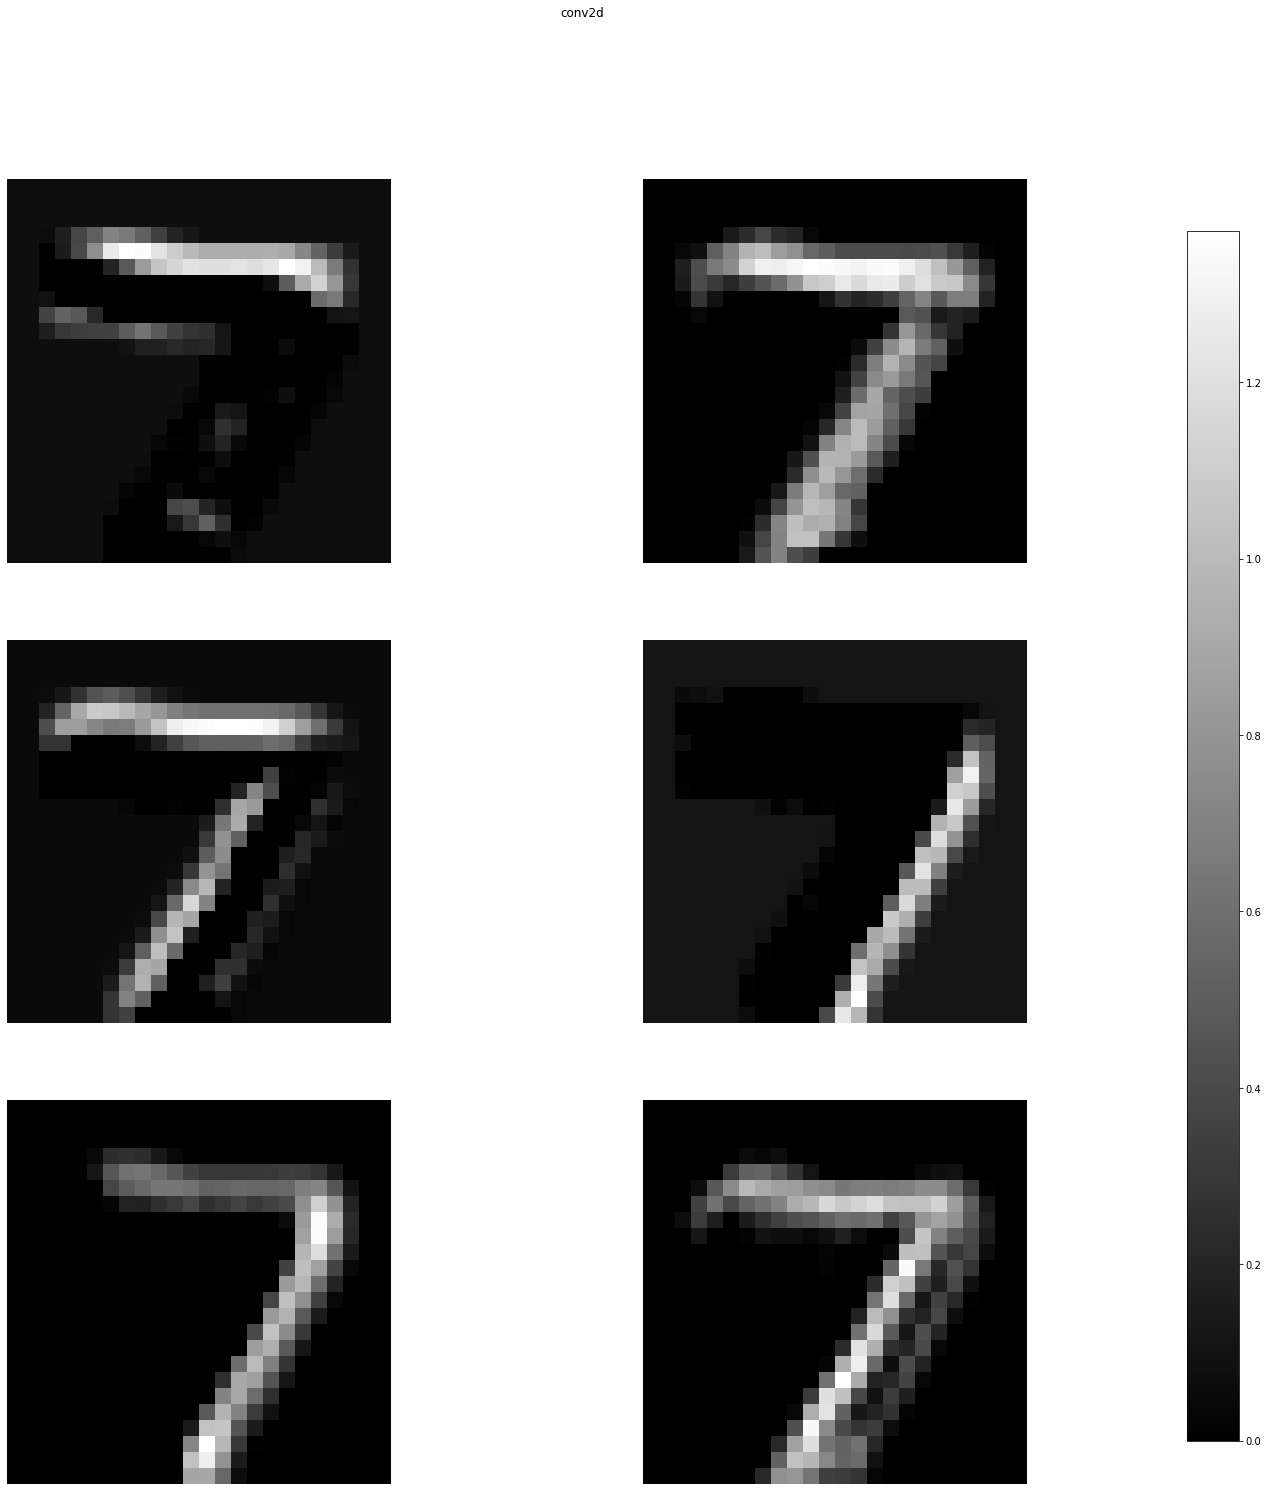

max_pooling2d (1, 12, 12, 6) 


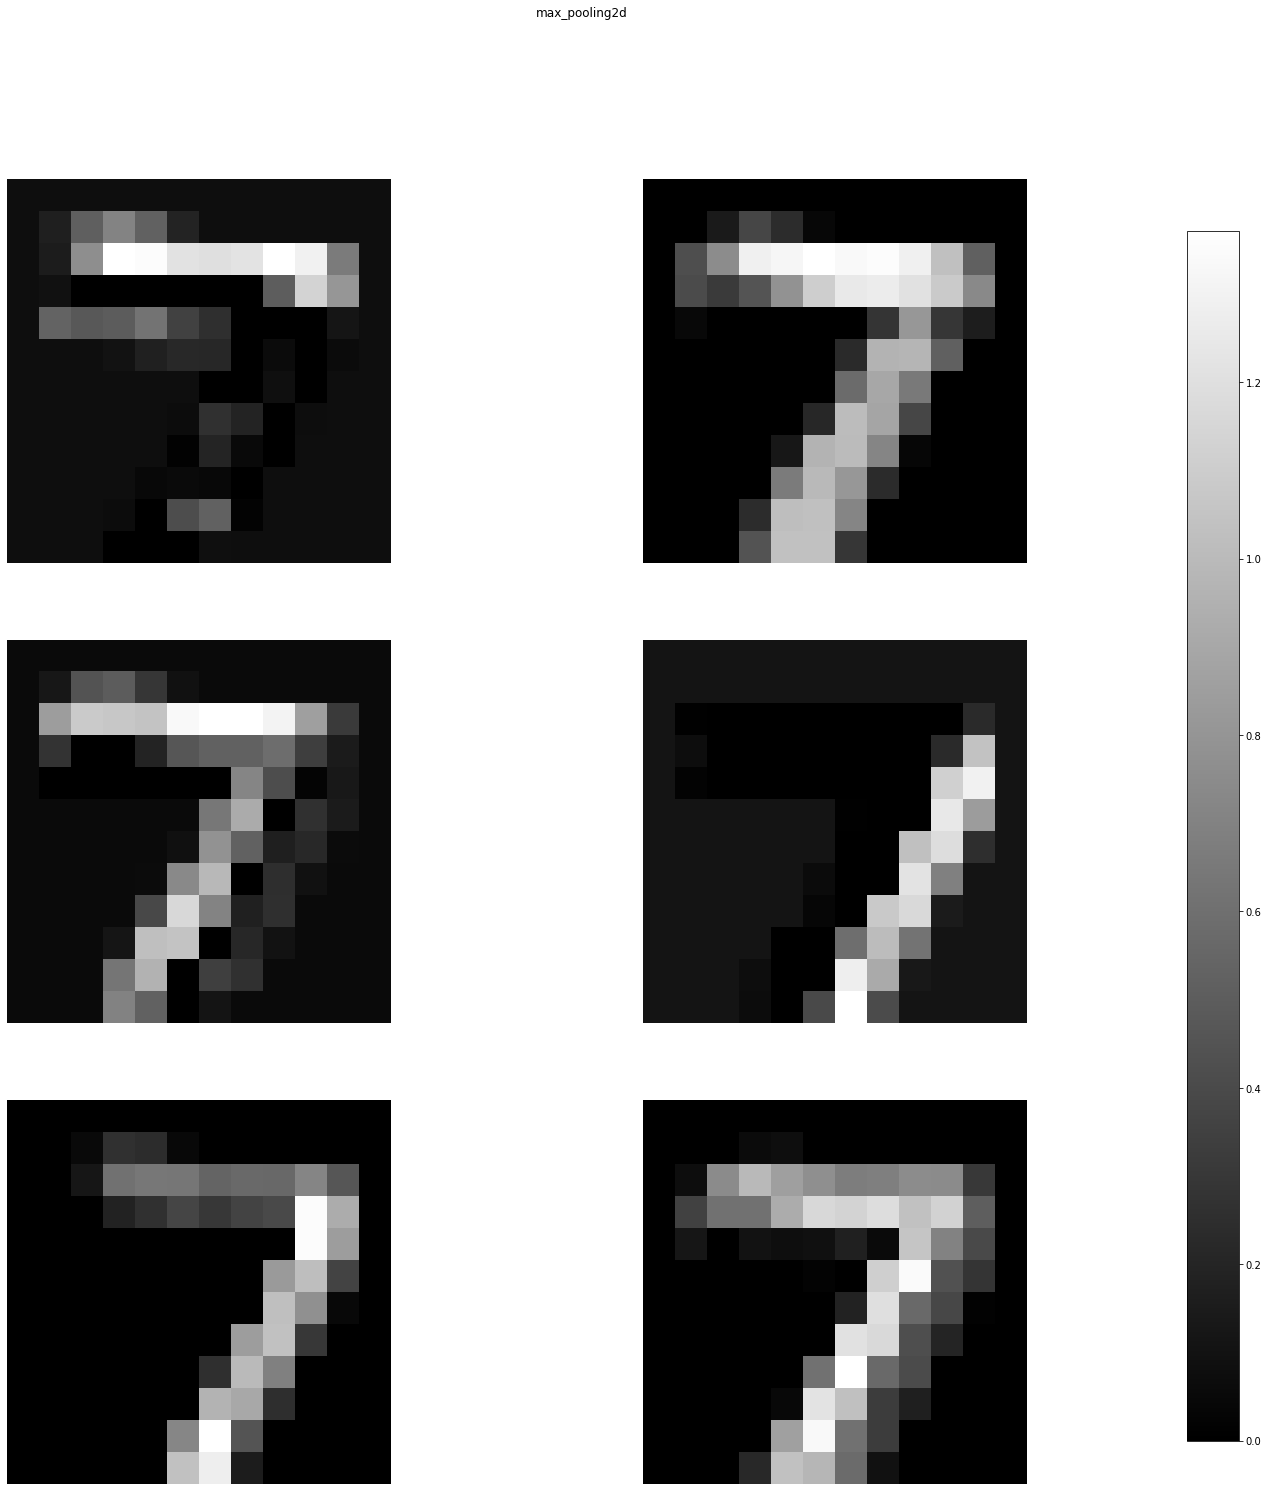

conv2d_1 (1, 8, 8, 10) 


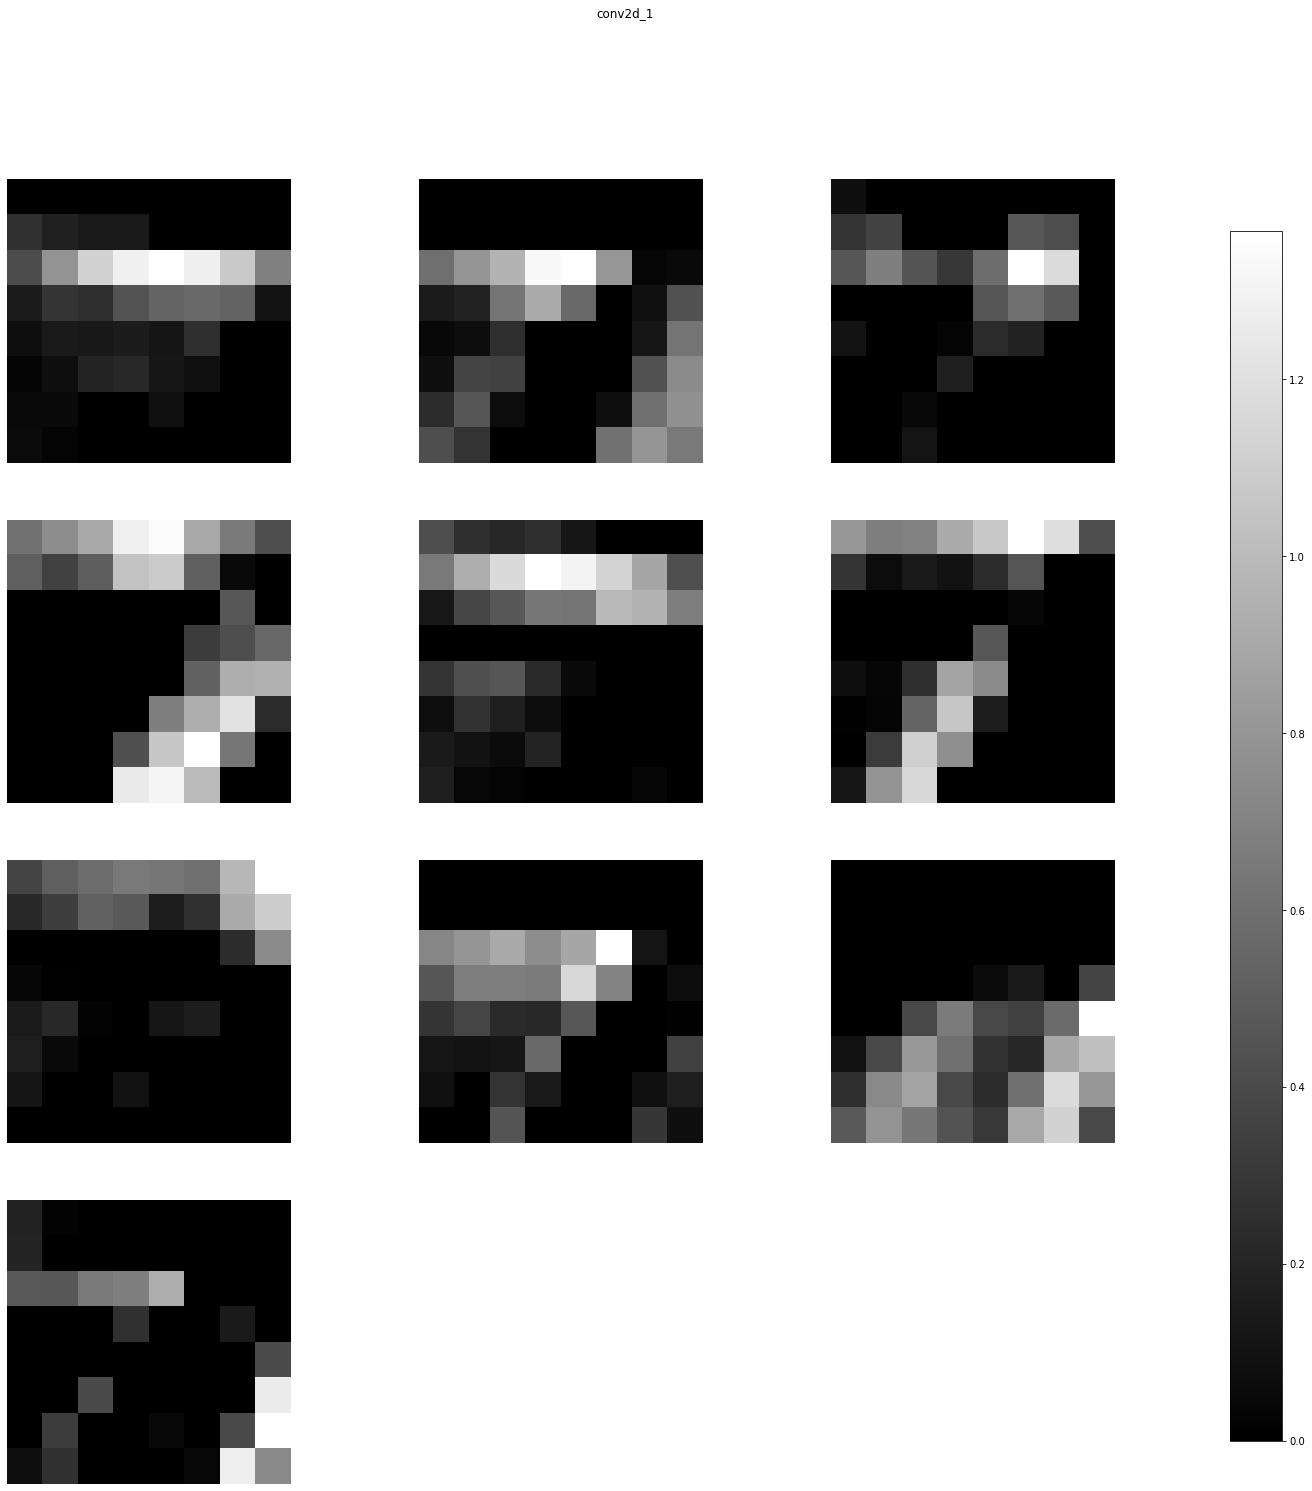

flatten (1, 640) 


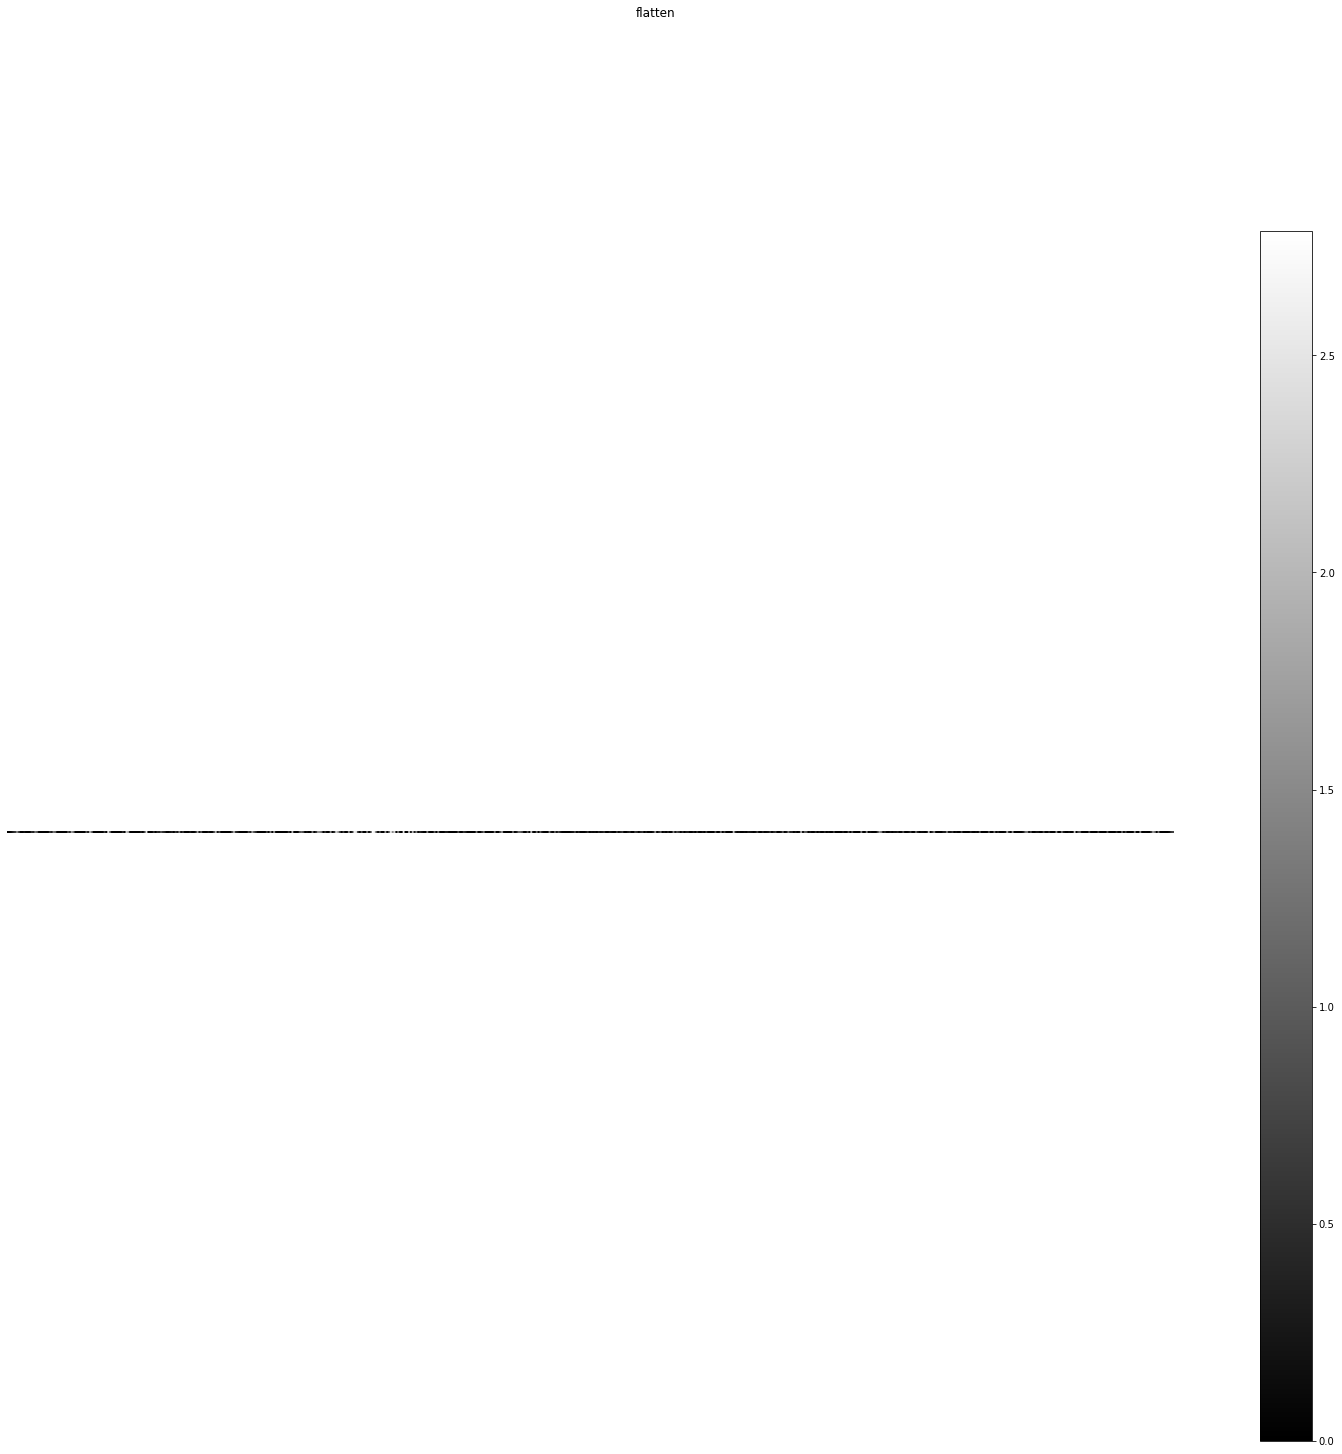

dense (1, 256) 


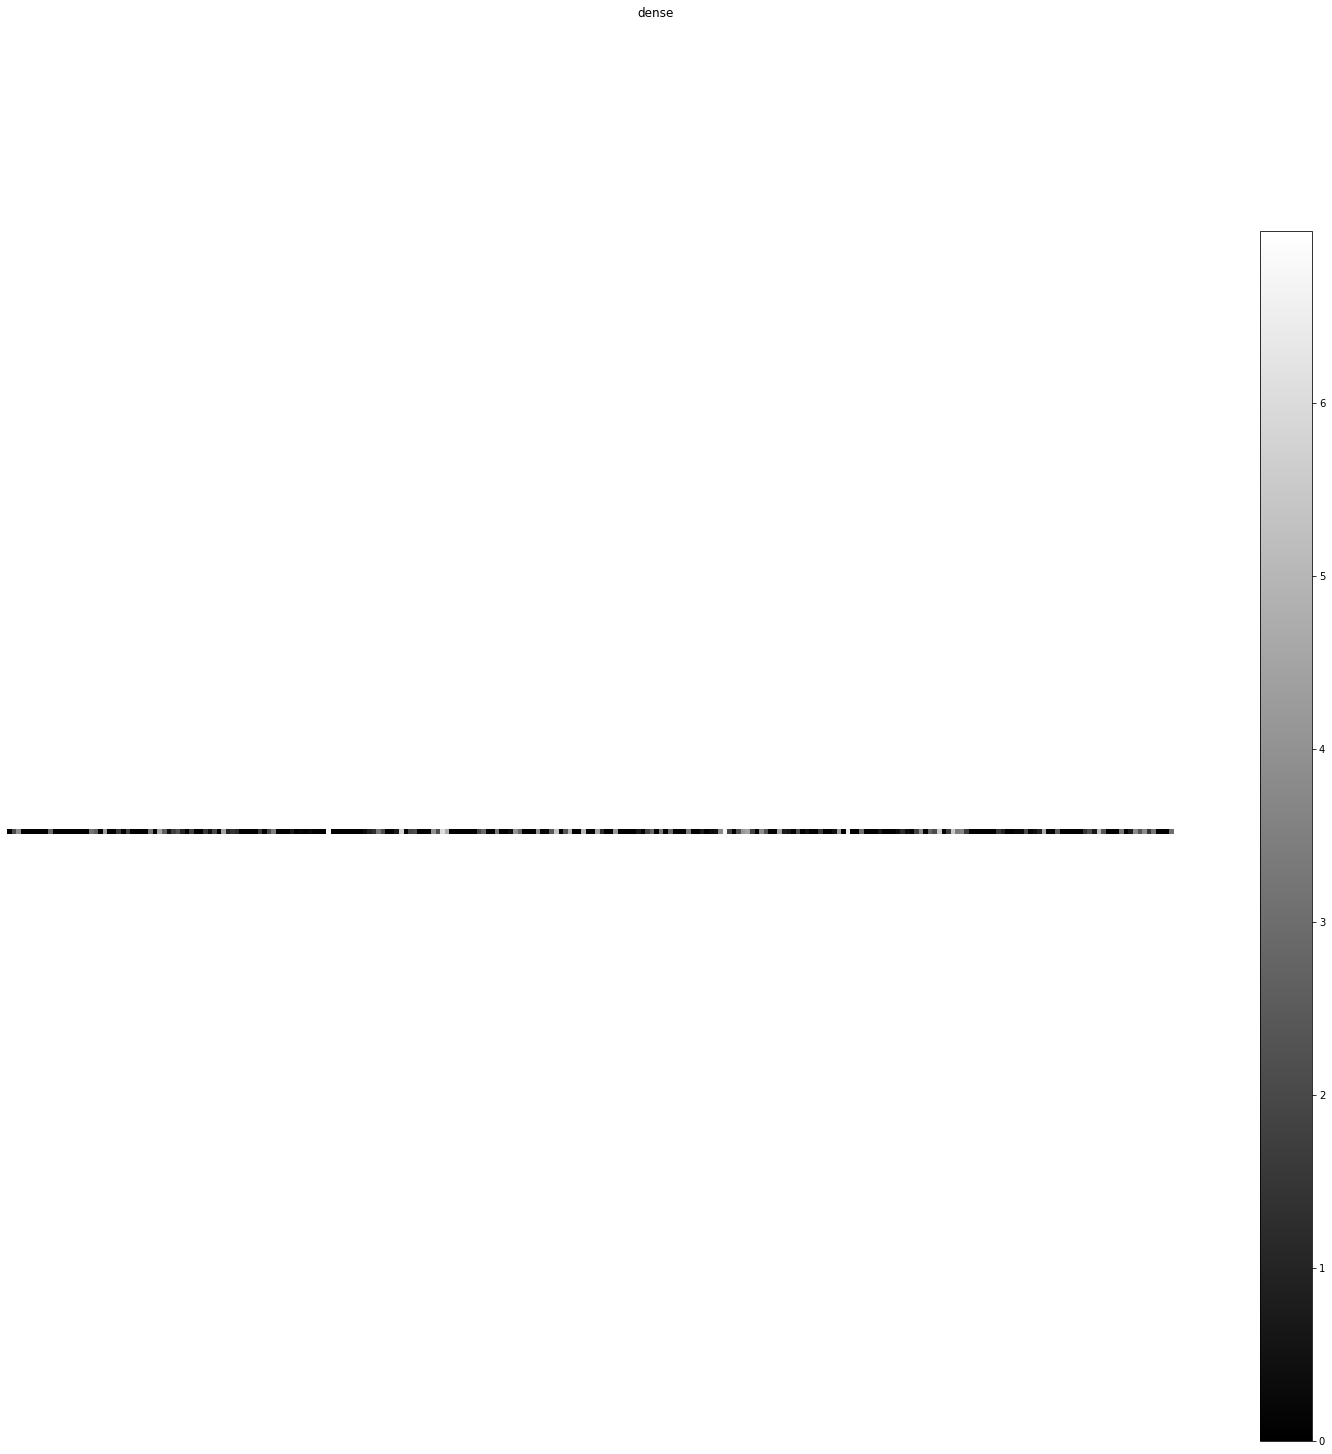

dense_1 (1, 10) 


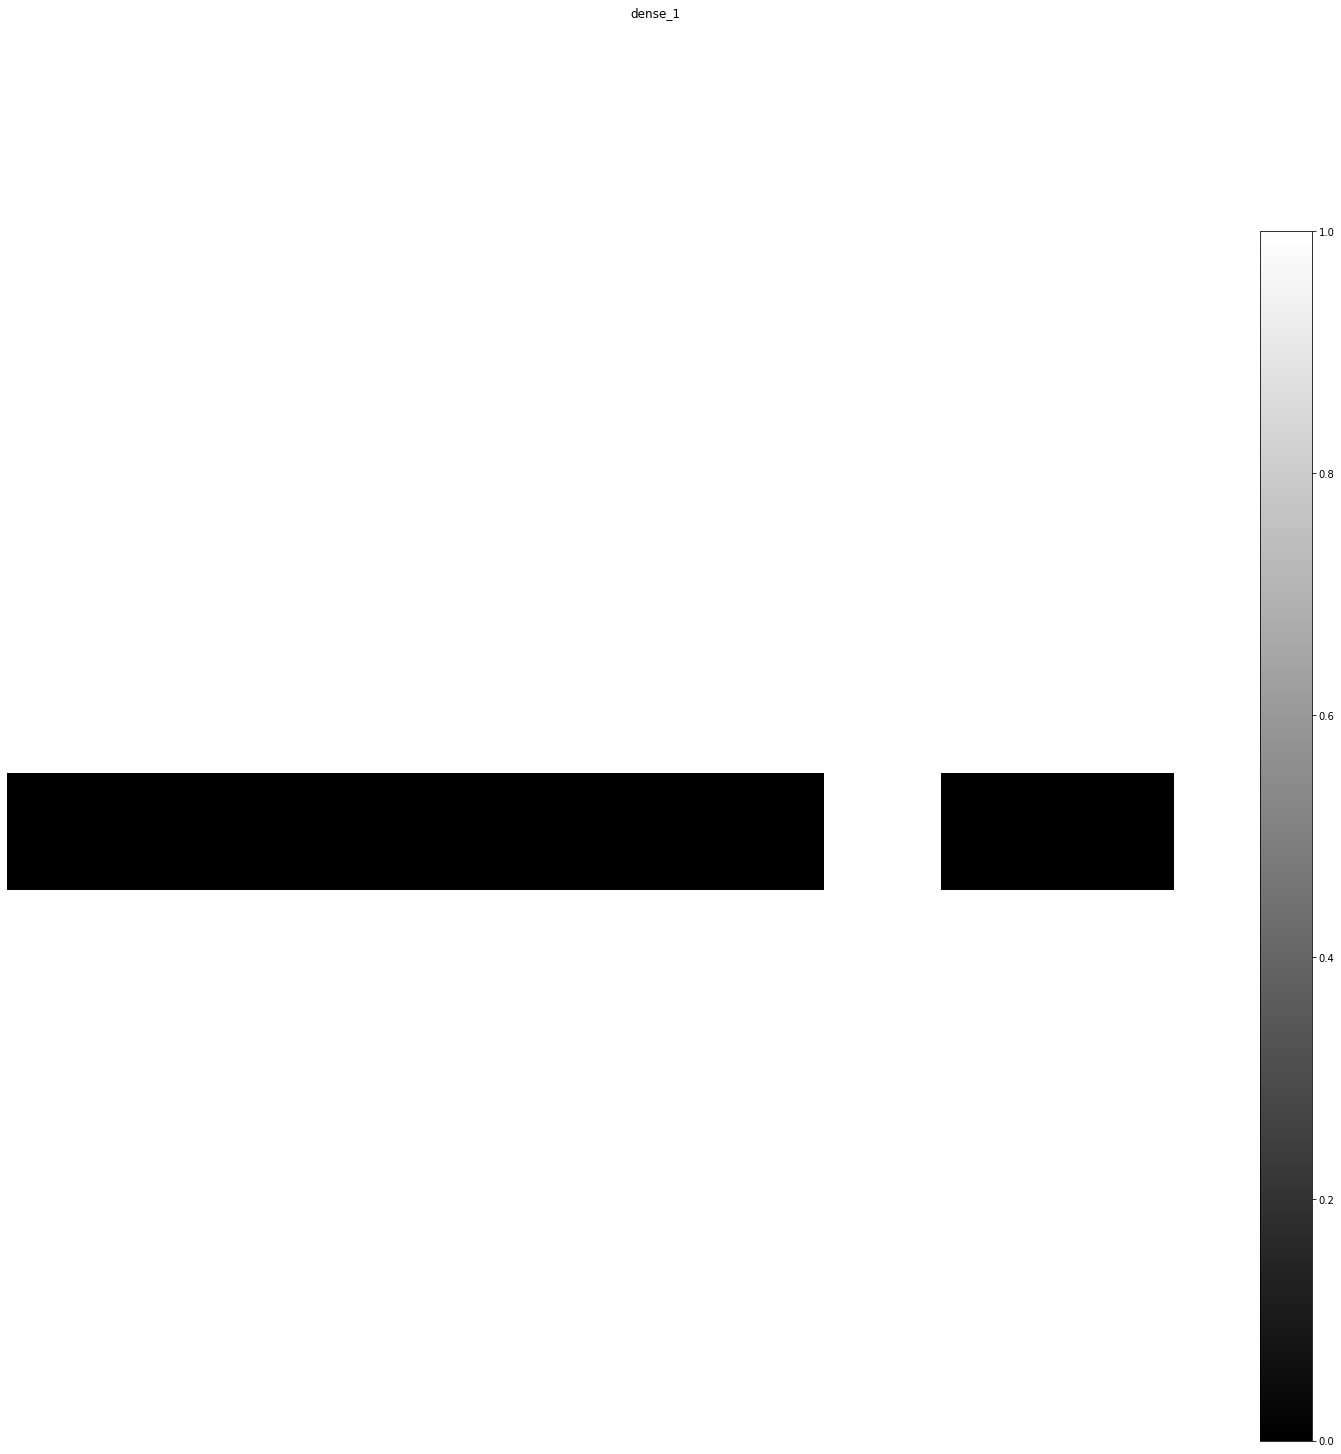

In [10]:
# Визуализируем активации с помощью keract.
# С помощью array slicing выделяем первый элемент из массива. (Результат должен также быть массивом.)
inputs = input_test[:1]
activations = get_activations(model, inputs)
display_activations(activations, cmap="gray", save=False)

conv2d_input (1, 28, 28, 1) 


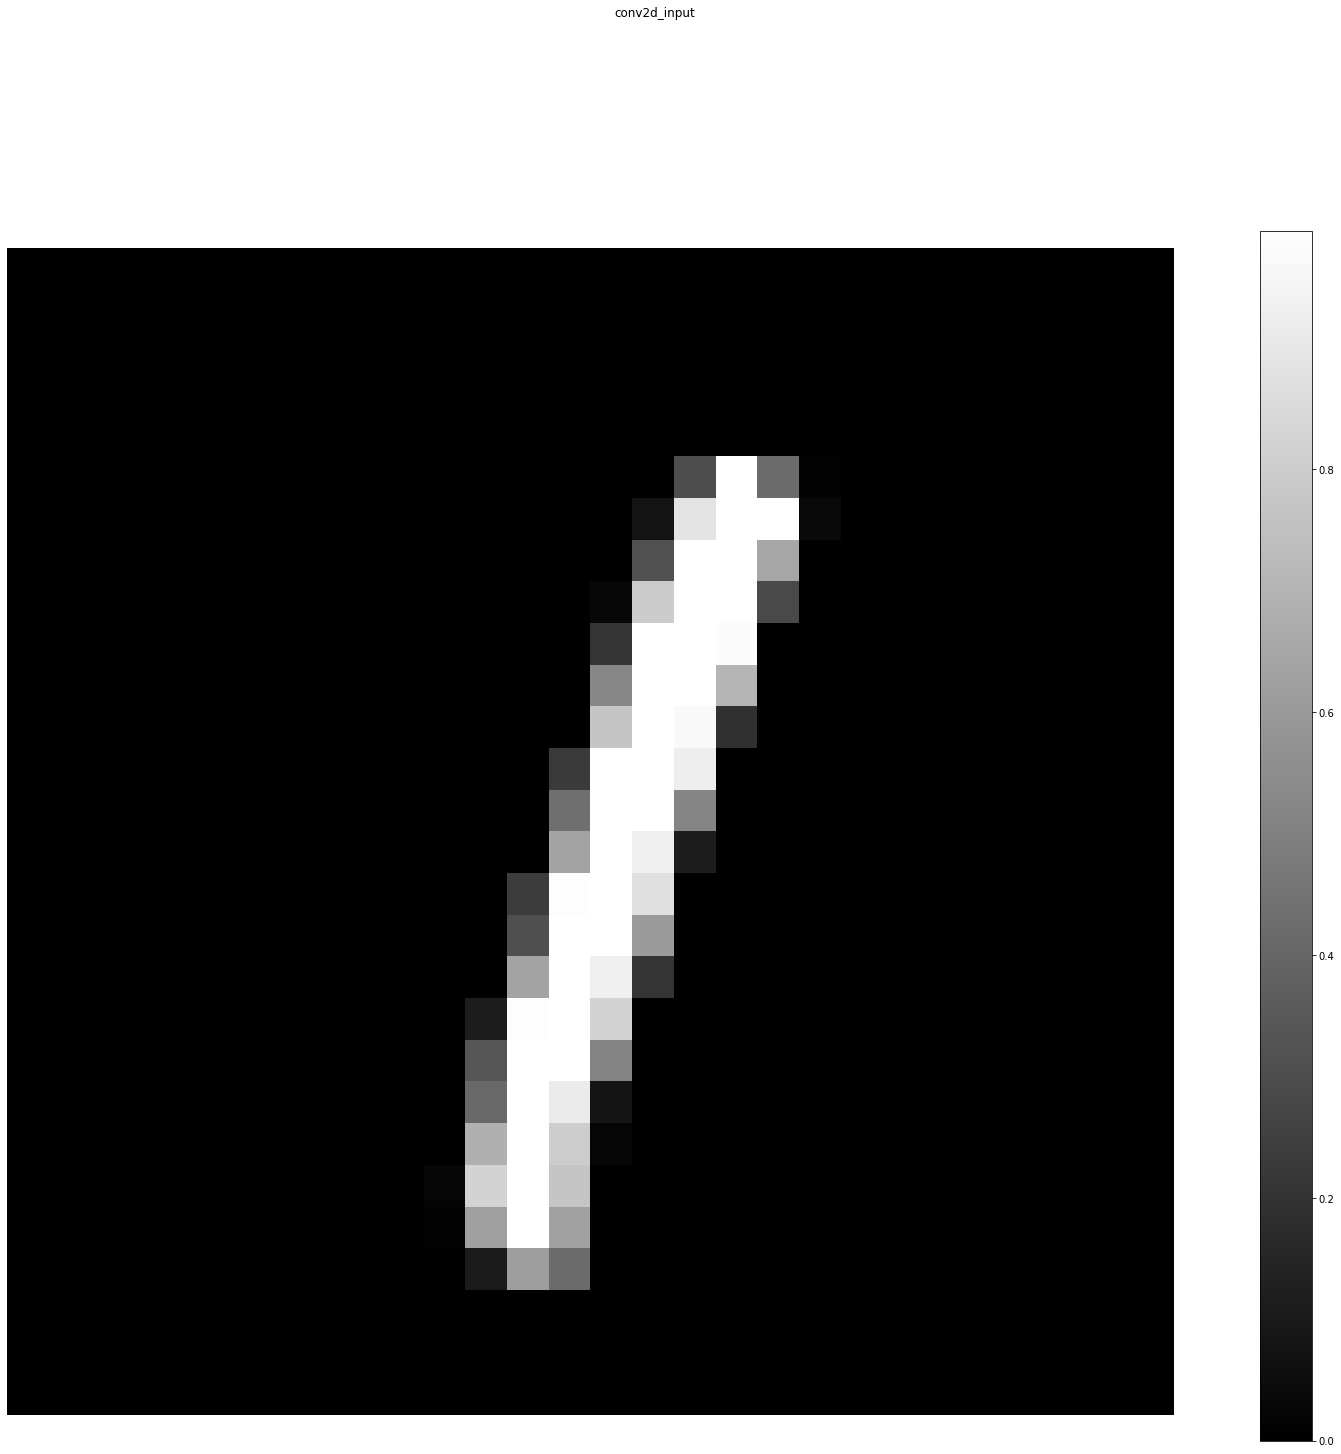

conv2d (1, 24, 24, 6) 


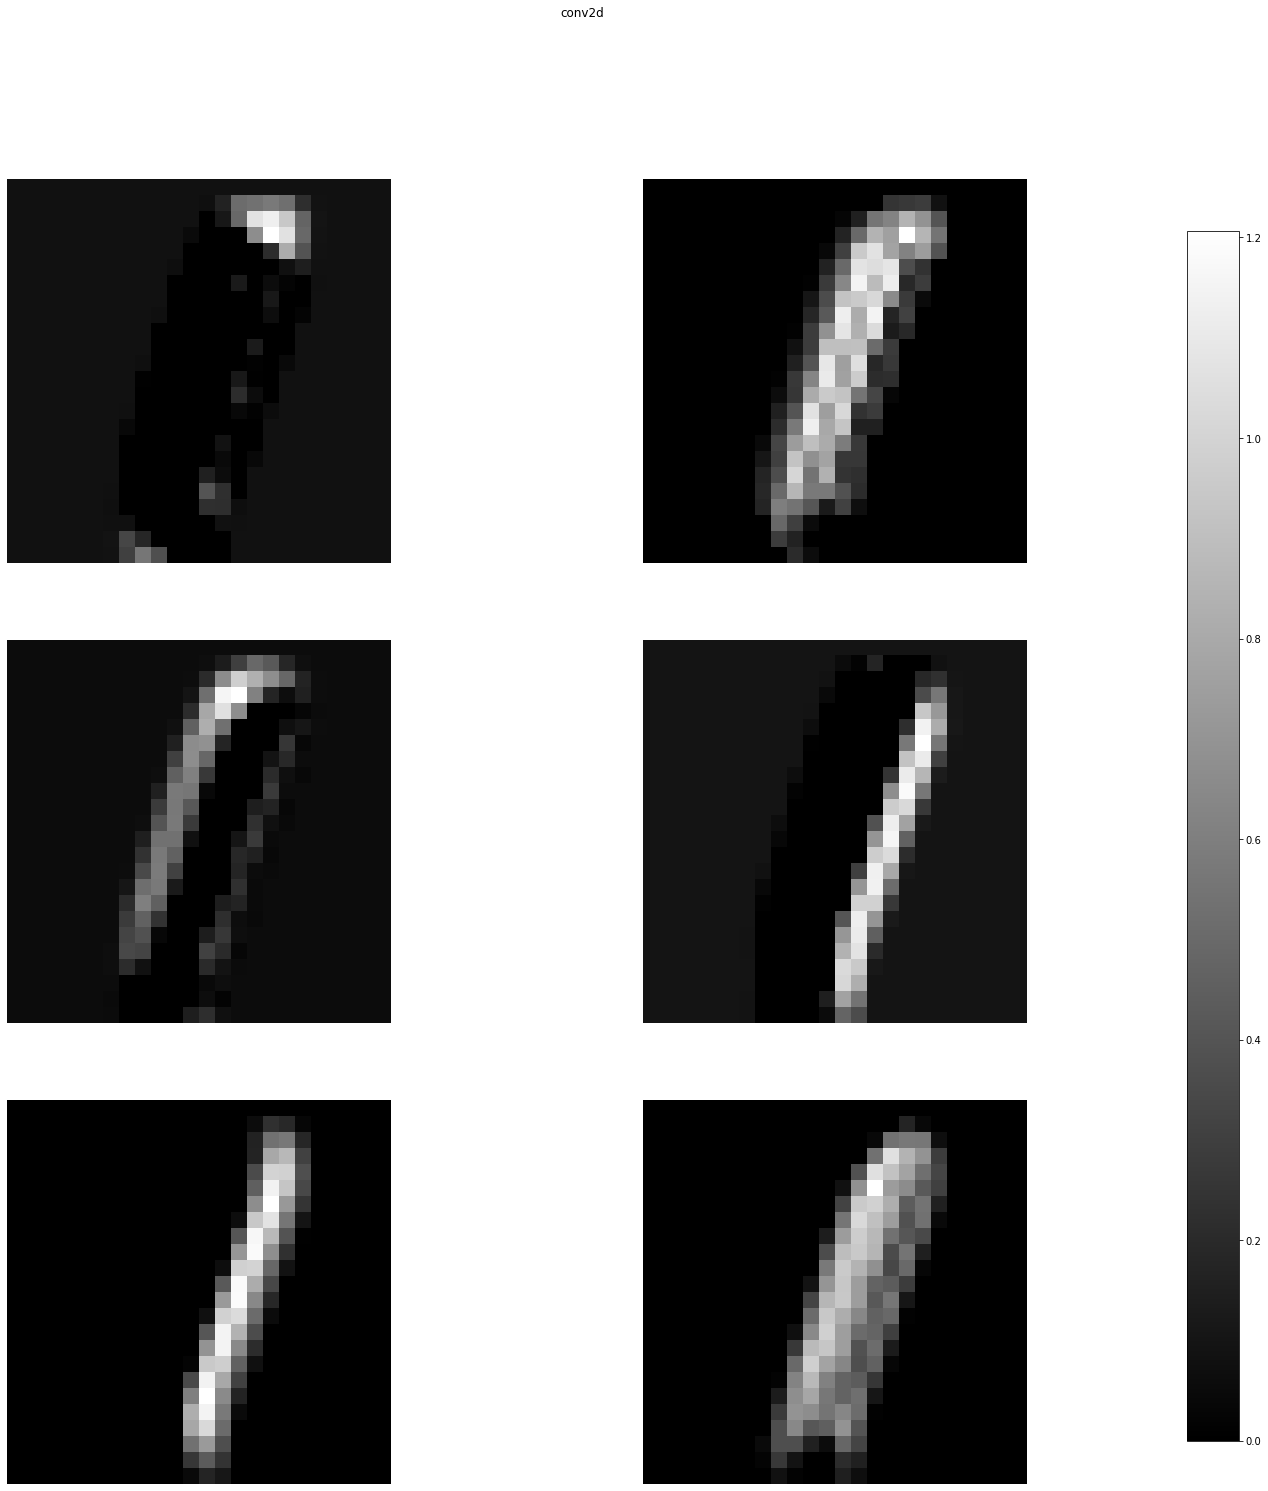

max_pooling2d (1, 12, 12, 6) 


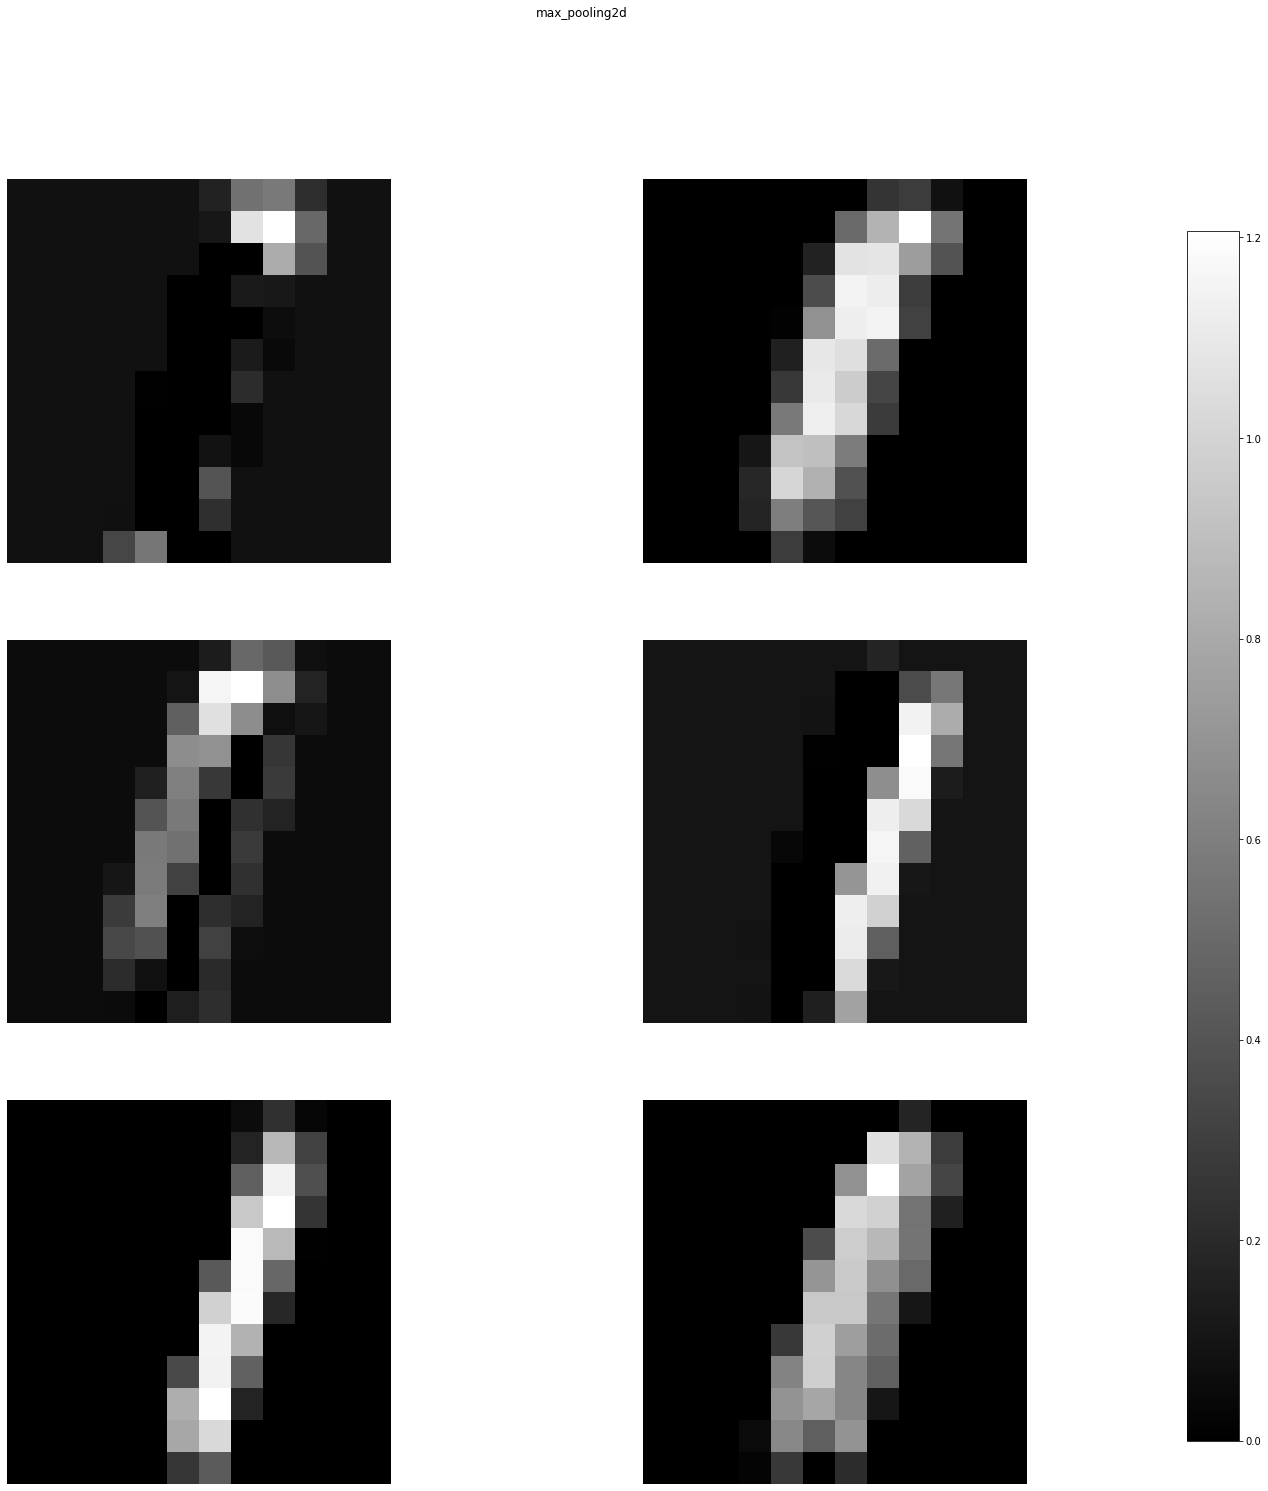

conv2d_1 (1, 8, 8, 10) 


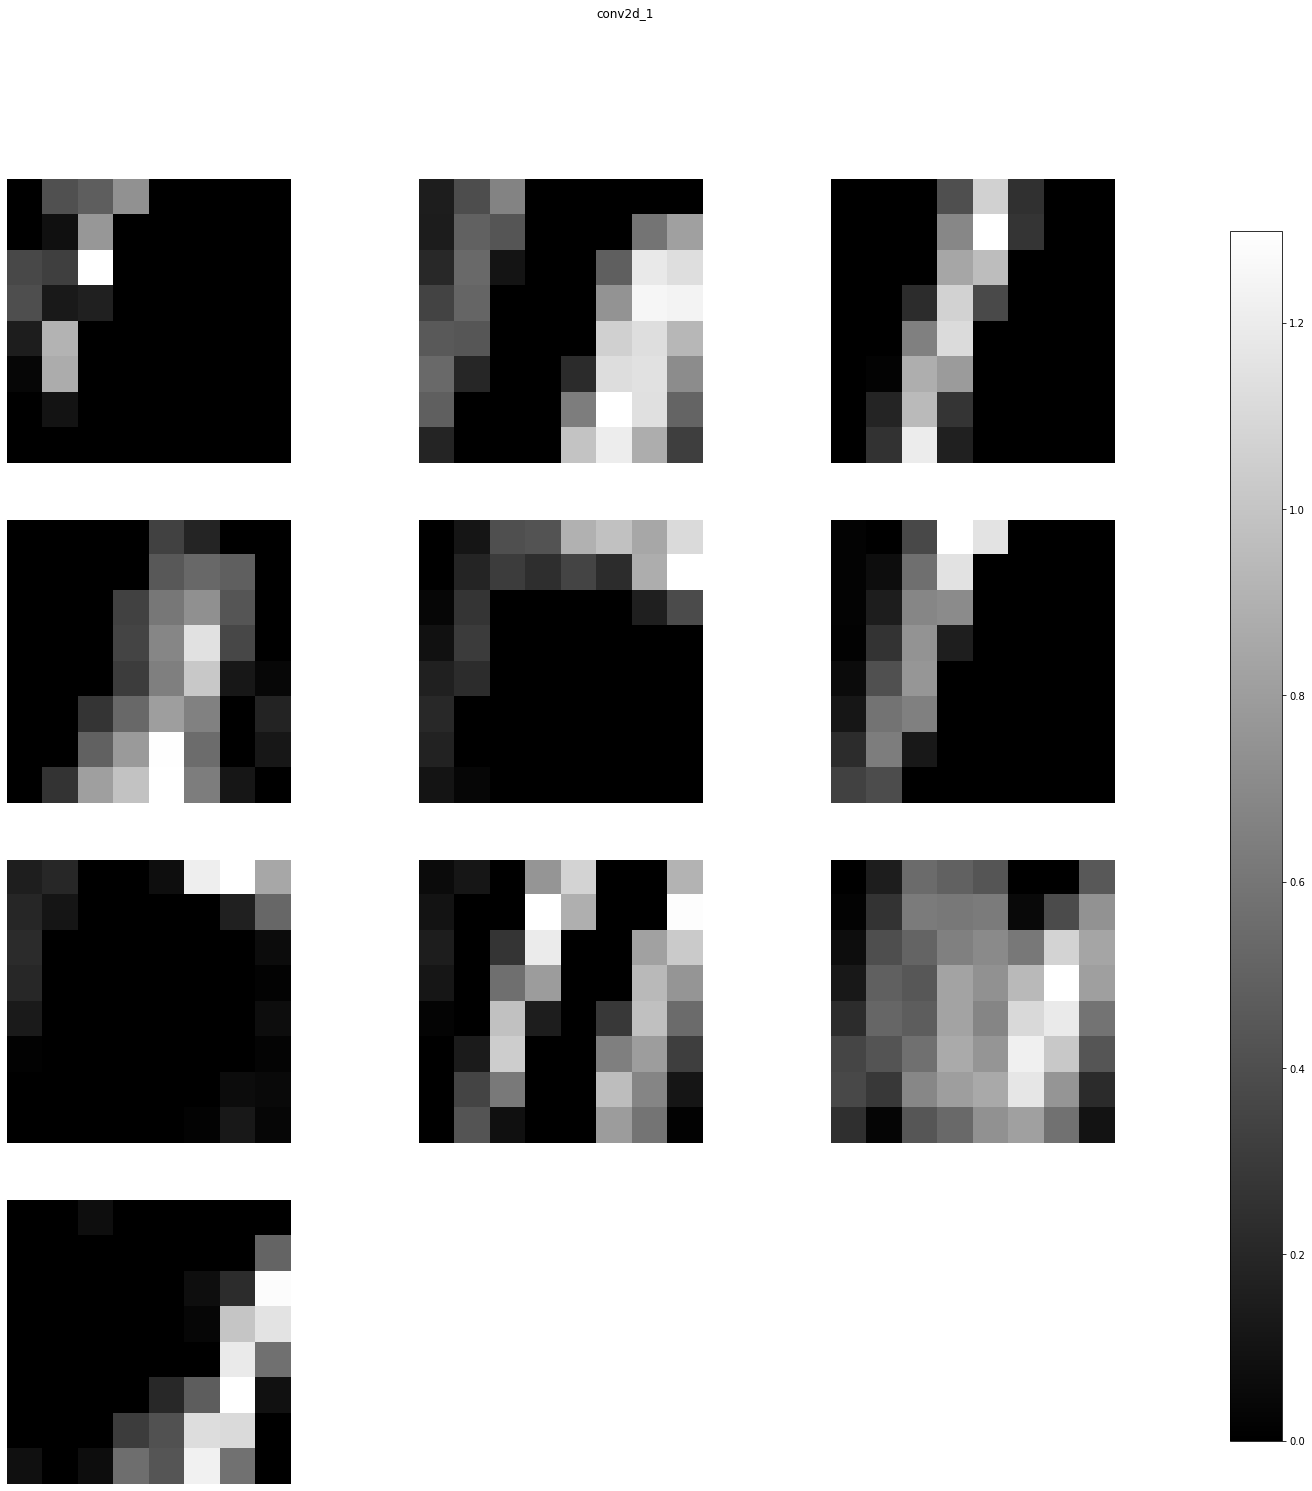

flatten (1, 640) 


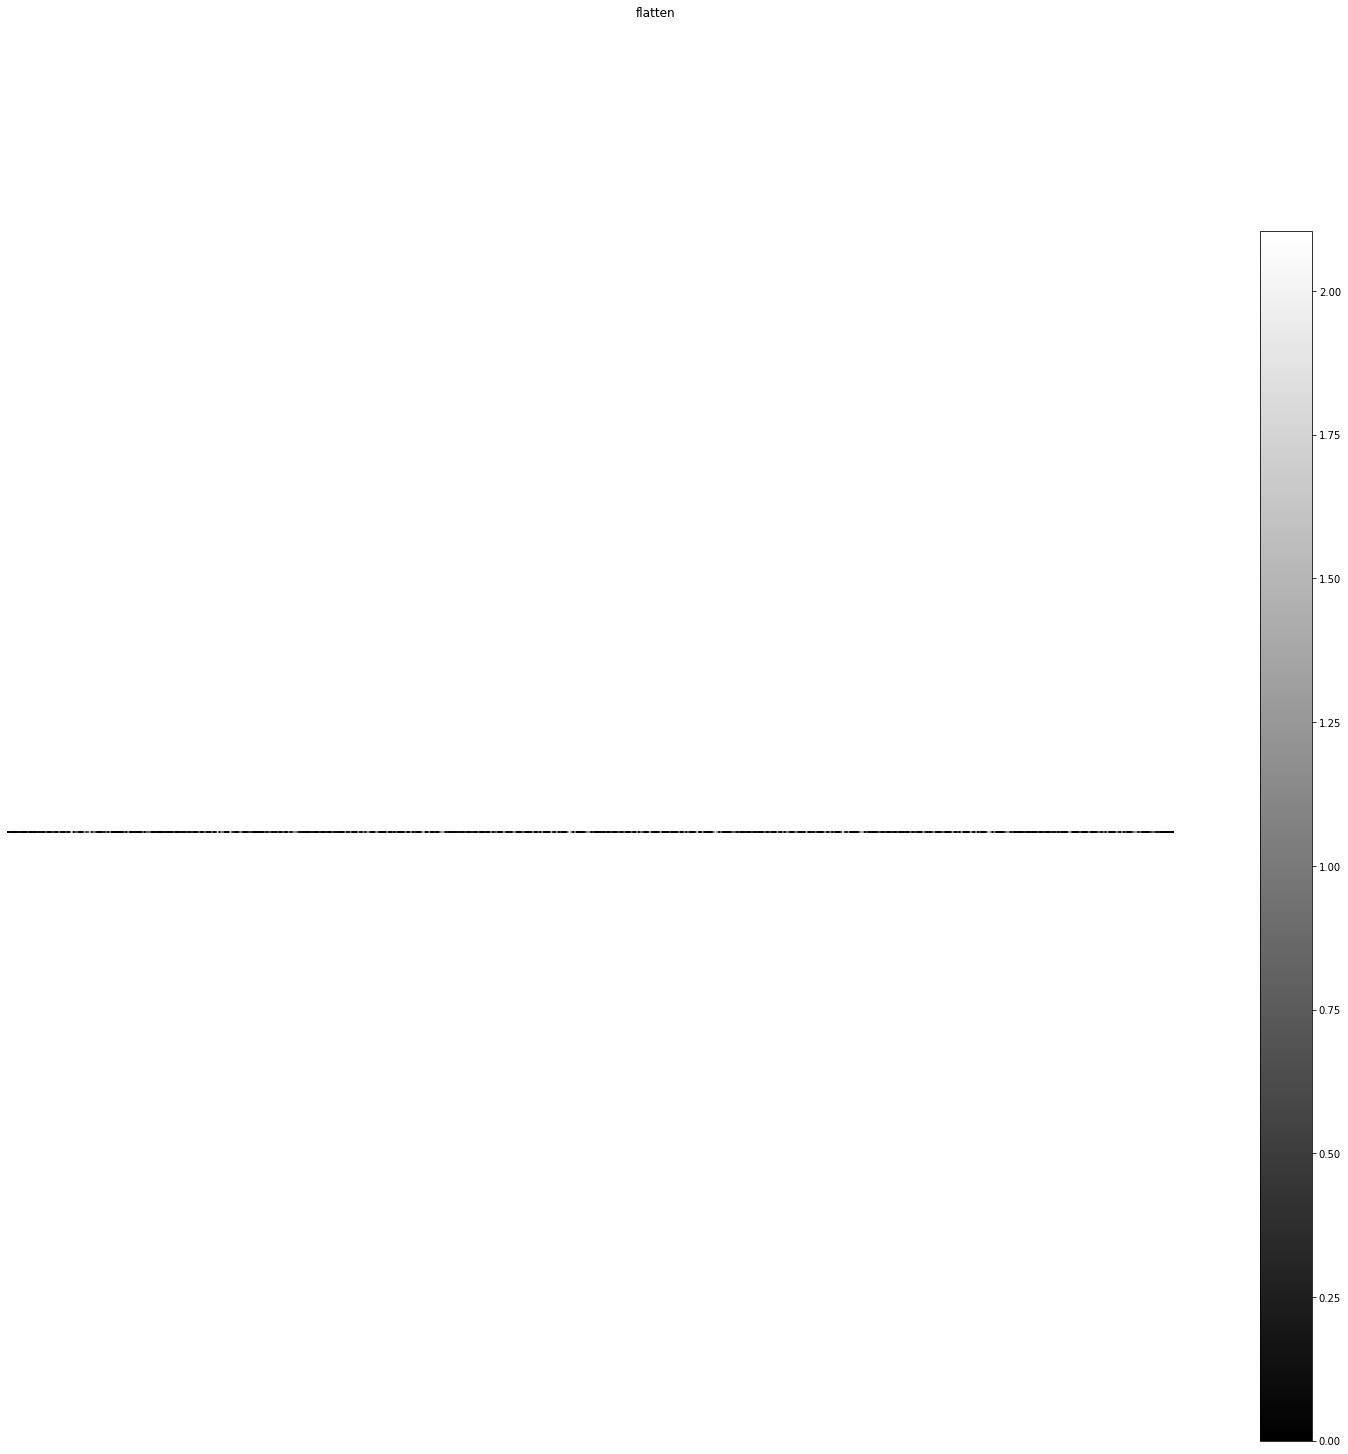

dense (1, 256) 


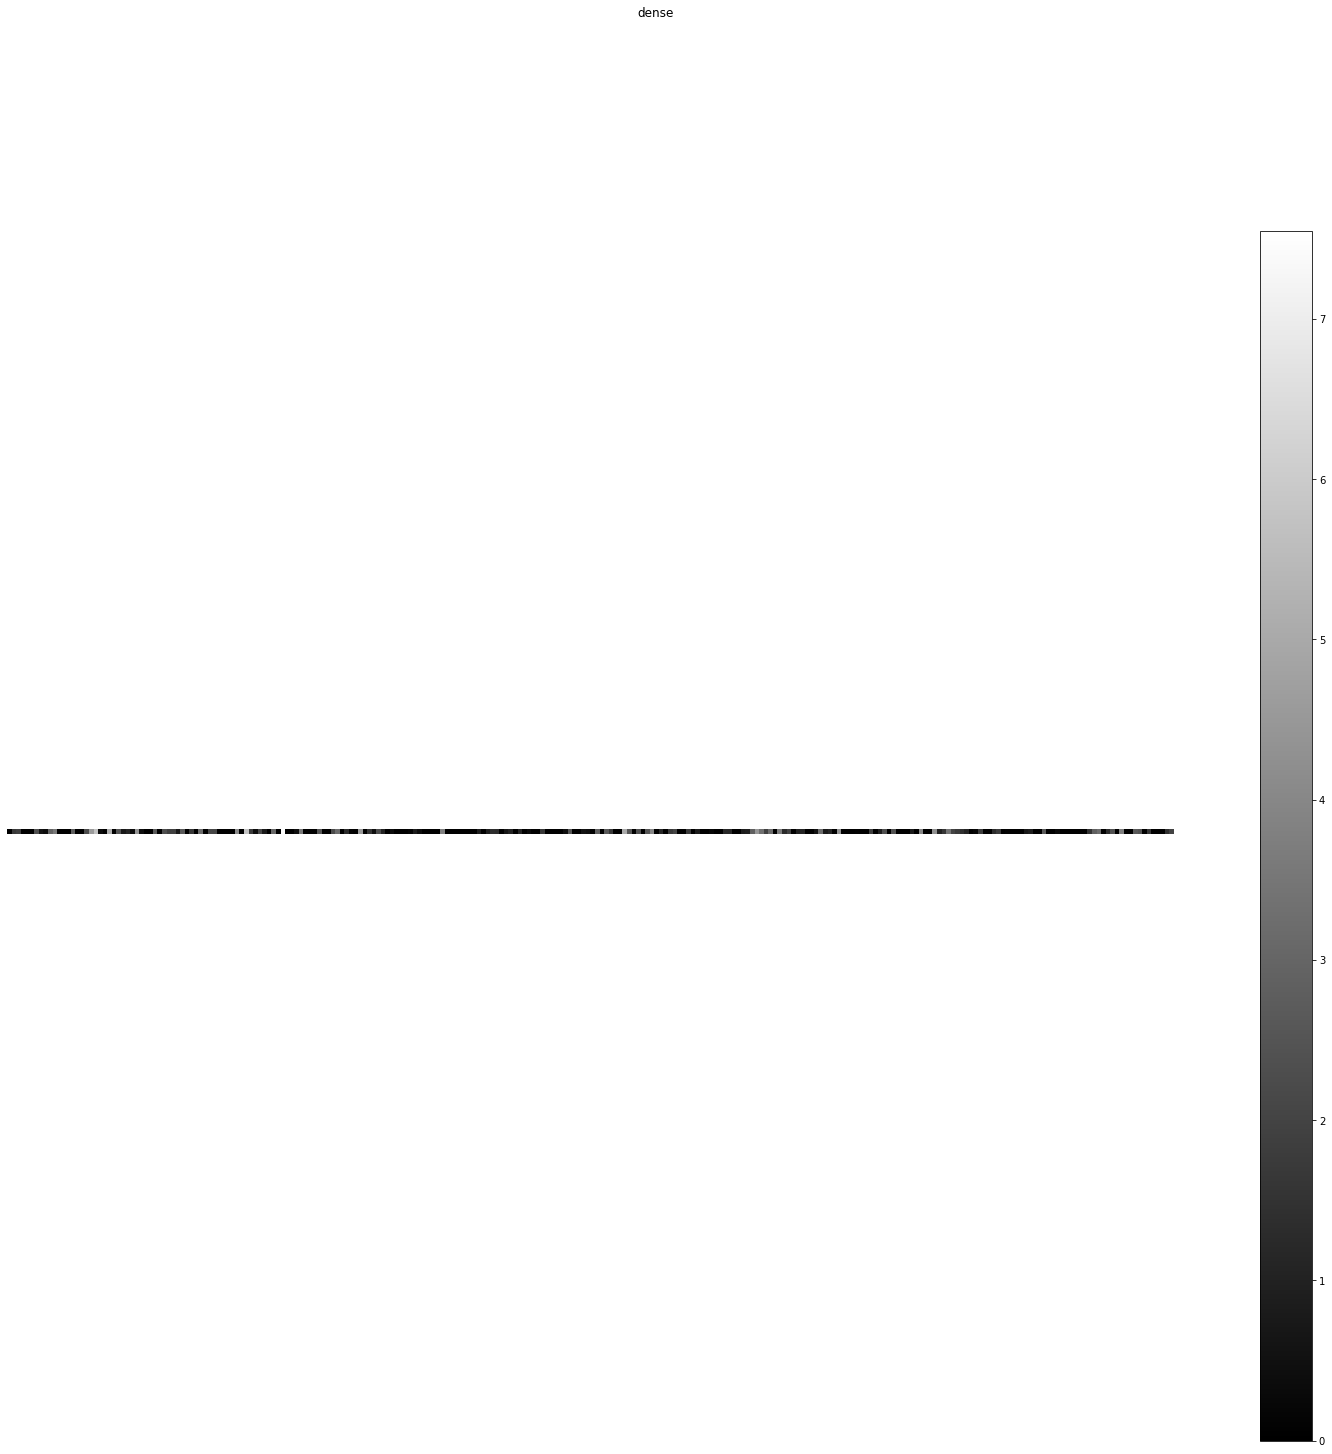

dense_1 (1, 10) 


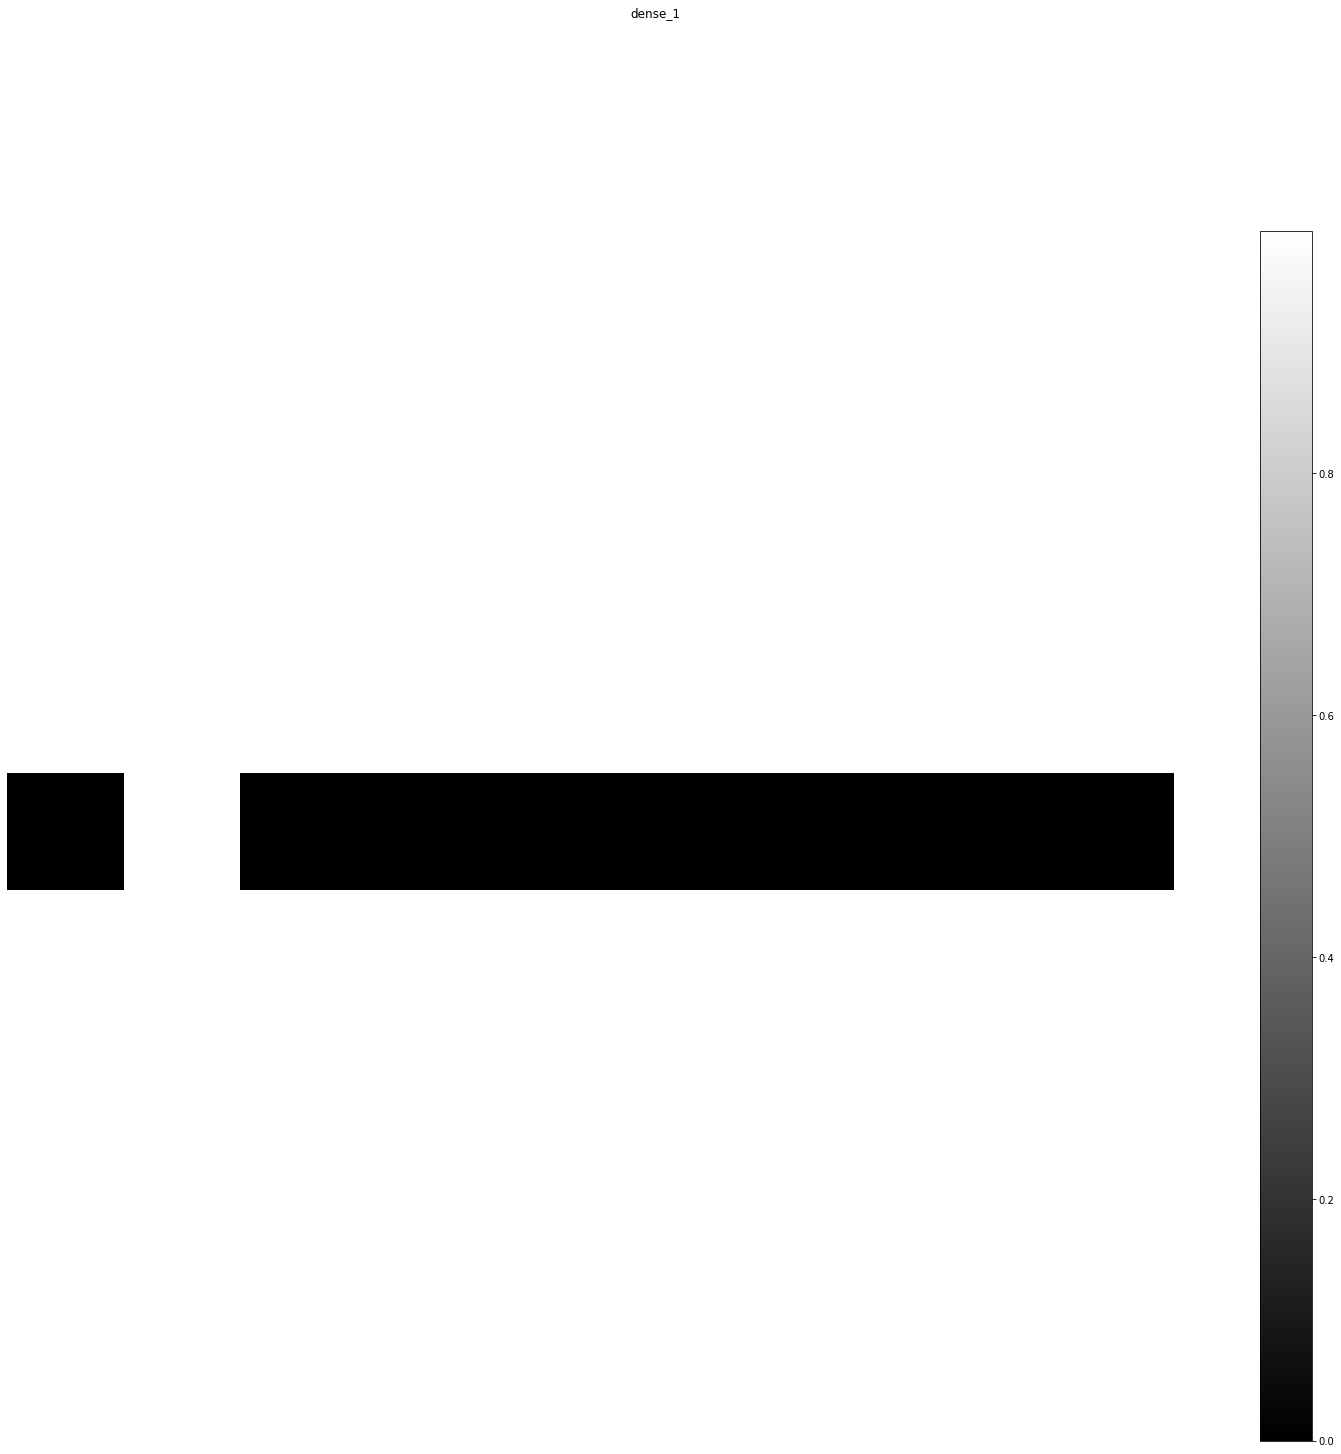

In [11]:
# Визуализируем активации с помощью keract.
# С помощью array slicing выделяем ещё какой-нибудь элемент из массива. (Результат должен также быть массивом.)
keract_inputs = input_test[5:6]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)